# Sephora Products Analysis Project
### Data Wrangling & Digital Analysis
Mia Belli - University of San Francisco

### Where did I find this dataset? What type of file is this data?
> Kaggle.com

> It's a CSV file with 21 columns and 9,000+ rows!

### What kind of data does this contain?
> All products that Sephora sold from three years ago. Column keys include product ID, brand, category (like makeup, perfume, skincare, etc.), name, ratings, prices, ingredients, and more.

In [1]:
import pandas as pd

In [2]:
# seeing data dictionary
seph = pd.read_csv('sephora_website_dataset.csv')
seph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [3]:
seph.head() # view as a table

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [4]:
seph.isnull().sum()
# no null values in this data set so no need to clean the data

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

## Question 1: Find the number of products that are only offered online. Then, create a pie chart showing this data.

In [5]:
import matplotlib.pyplot as plt

In [6]:
seph.groupby("online_only")["id"].count()
# binary: 1 = online only, 0 = in-store/online

online_only
0    7015
1    2153
Name: id, dtype: int64

In [7]:
online_only=seph["online_only"].value_counts() # making it the counts a variable for histogram

In [8]:
online_only

0    7015
1    2153
Name: online_only, dtype: int64

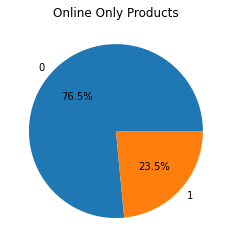

In [9]:
plt.pie(online_only.values, labels=online_only.index, autopct='%.1f%%')
plt.title("Online Only Products")

plt.savefig("OnlineOnlyProducts.jpg")

### What This Shows & Reasoning

> 23.5% of Sephora's products are only offered online. Since a lot of people enjoy online shopping more because of easy delivery and returns, Sephora might want to consider offering more products online rather than having it in-store. Then, Sephora can just have the generic and highly popular products rather than an overwhelming amount of products to manage in stores.

## Question 2: Find the distribution of the ratings for the skincare categories of Face Serums,  Moisturizers, Fash Wash & Cleansers, and Face Masks.

In [10]:
seph_skin = seph[seph.category.isin(['Face Serums', 'Moisturizers', 'Face Wash & Cleansers', 'Face Masks'])]
seph_skin

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
63,1957182,Algenist,Face Serums,GENIUS Liquid Collagen,no size,4.0,656,41300,115.0,115.0,...,True,exclusive,no options,What it is: A vegan collagen treatment serum ...,Suggested Usage:-After cleansing and toning- a...,-Patented Alguronic Acid: Naturally sourced a...,0,1,0,0
64,2170827,Algenist,Moisturizers,GENIUS Sleeping Collagen,2 oz/ 60 mL,4.5,1000,18200,98.0,98.0,...,True,exclusive,no options,What it is: A vegan- buttery- collagen sleepi...,Suggested Usage:-After cleanser- apply a pea-s...,-Patented Alguronic Acid: Naturally sourced a...,0,1,0,0
66,1582477,Algenist,Moisturizers,GENIUS Ultimate Anti-Aging Cream,no size,4.5,462,16200,112.0,112.0,...,False,0,no options,What it is: A vegan- collagen-infused advance...,Suggested Usage:-After cleansing- apply to the...,-Patented Alguronic Acid: Naturally sourced a...,0,0,0,0
71,1675974,Algenist,Face Serums,GENIUS Ultimate Anti-Aging Vitamin C+ Serum,1 oz/ 30 mL,4.0,221,8900,118.0,118.0,...,False,0,no options,Which skin type is it good for?✔ Normal✔ Oily✔...,Suggested Usage:-After cleansing- apply to the...,-Alguronic Acid: Improves the appearance of fi...,0,0,0,0
73,2211753,Algenist,Face Masks,ALIVE Prebiotic Balancing Mask,1.7 oz/ 50 mL,4.5,63,8100,38.0,38.0,...,True,exclusive,no options,What it is: A vegan prebiotic and probiotic c...,Suggested Usage:-Apply evenly over face to cle...,-Patented Alguronic Acid: Clinically proven t...,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9131,2208494,SEPHORA COLLECTION,Face Masks,The Blue Mask,no size,3.5,20,4100,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- ultra-toning fo...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Sapphire Extract: Smooths tired-looking skin....,0,1,1,0
9141,2210284,SEPHORA COLLECTION,Face Masks,The Golden Mask,no size,4.0,22,5000,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- ultra-moisturiz...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Honey Extract: Known for its moisturizing pow...,0,1,1,0
9148,1617489,SEPHORA COLLECTION,Face Masks,Mud Mask Purifying & Mattifying,no size,4.5,1000,48200,20.0,20.0,...,True,exclusive,no options,What it is: \nA mud mask featuring zinc and co...,Suggested Usage:-Use one to two times per week...,-Zinc and Copper: Purify.\n-White Clay: Softe...,0,1,0,0
9152,1662410,SEPHORA COLLECTION,Face Wash & Cleansers,Supreme Cleansing Oil,6.4 oz/ 190 mL,4.5,357,15800,15.0,15.0,...,True,exclusive,no options,What it is:\nA cleansing oil with the effectiv...,Suggested Usage:\n-Dispense one dose from the ...,-Cottonseed Oil: Nourishes and provides smoot...,0,1,0,0


In [11]:
import numpy as np

In [12]:
bins = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
labels = pd.cut(seph_skin.rating, bins)
labels

63      (3.5, 4.0]
64      (4.0, 4.5]
66      (4.0, 4.5]
71      (3.5, 4.0]
73      (4.0, 4.5]
           ...    
9131    (3.0, 3.5]
9141    (3.5, 4.0]
9148    (4.0, 4.5]
9152    (4.0, 4.5]
9163    (1.5, 2.0]
Name: rating, Length: 1312, dtype: category
Categories (10, interval[float64, right]): [(0.0, 0.5] < (0.5, 1.0] < (1.0, 1.5] < (1.5, 2.0] ... (3.0, 3.5] < (3.5, 4.0] < (4.0, 4.5] < (4.5, 5.0]]

In [13]:
grouped = seph_skin.groupby(['category', labels])
grouped.size().unstack(0)

category,Face Masks,Face Serums,Face Wash & Cleansers,Moisturizers
rating,,,,
"(0.0, 0.5]",0,0,0,0
"(0.5, 1.0]",0,1,0,1
"(1.0, 1.5]",0,0,0,0
"(1.5, 2.0]",1,2,0,1
"(2.0, 2.5]",3,1,2,0
"(2.5, 3.0]",6,9,5,8
"(3.0, 3.5]",11,33,11,49
"(3.5, 4.0]",67,136,75,177
"(4.0, 4.5]",127,163,135,175


### What This Shows & Reasoning

> Sephora has been trying to expand their product line beyond just makeup and into skincare. This is helpful in understanding the success of the skincare products that Sephora sells. We see that Face Serums and Moisturizers have the most products with the highest ratings, ranging from 4.0-4.5 and 4.5-5.0. These categories also offer a larger selection of products than the other categories. Additionally, Sephora can decide to discontinue certain skincare products that fall below a certain range like 2.5 and below.

## Question 3: Is there a relationship between the price and the number of people who loved the product (specifically skincare products)?

In [25]:
import seaborn as sns
import sklearn.linear_model

[(0.0, 20000.0),
 (0.0, 600.0),
 Text(0.5, 1.0, 'Number of People who Loved It vs. Price')]

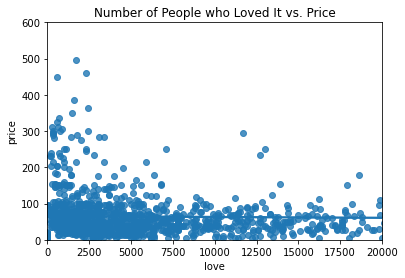

In [15]:
c=sns.regplot(x="love",y="price", data=seph_skin)
c.set(xlim=[0,20000], ylim=[0,600], title="Number of People who Loved It vs. Price")

In [29]:
# This relationship (or lack of) can be demonstrated through LINEAR REGRESSION too!
x = seph[['love']]
y = seph.price
x.shape

(9168, 1)

In [27]:
model = sklearn.linear_model.LinearRegression() # Calling linear reg model

model.fit(x,y) #Fit the model on the data

#Predicting the y
y_pred = model.predict(x) # generates points of a scatterplot
print(y_pred)

[51.36722048 51.39688194 51.40670362 ... 51.61836073 51.66206719
 51.66206719]


In [28]:
# Accuracy of Model >> Using r^2
r_sq = model.score(x,y)
print(r_sq)
    # this extremely low r^2 demonstrates that there is no correlation between 'price' and 'love'

0.007871975286964927


### What This Shows & Reasoning

> Sometimes, people like deals and less expensive products. Sephora could have offered a lot of good-quality skincare products at lower prices which would lead to more people giving likes to these types of products. However, this is not the case because the linear regression is horizontal so there is no correlation between these two keys.

## Question 4: Find all the products that do not list its ingredients. Then, count the number of products with missing ingredients from each brand. Finally, list the 7 AERIN products that don't disclose any ingredients.

In [16]:
seph_frame = pd.DataFrame(seph, columns=['id', 'name', 'brand', 'ingredients'])
seph_frame

,id,name,brand,ingredients
0,2218774,Blu Mediterraneo MINIATURE Set,Acqua Di Parma,Arancia di Capri Eau de Toilette: Alcohol Dena...
1,2044816,Colonia,Acqua Di Parma,unknown
2,1417567,Arancia di Capri,Acqua Di Parma,Alcohol Denat.- Water- Fragrance- Limonene- Li...
3,1417617,Mirto di Panarea,Acqua Di Parma,unknown
4,2218766,Colonia Miniature Set,Acqua Di Parma,Colonia: Alcohol Denat.- Water- Fragrance- Lim...
...,...,...,...,...
9163,2208502,The Rose Gold Mask,SEPHORA COLLECTION,-Rose Quartz Extract: Hydrates dry skin. Aqua...
9164,2298909,Give Me Some Sugar Colorful Gloss Balm Set,SEPHORA COLLECTION,Colorful Gloss Balm Wanderlust: Hydrogenated P...
9165,2236750,Weekend Warrior Tone Up Cream,SEPHORA COLLECTION,Aqua (Water)- Dimethicone- Isohexadecane- Poly...
9166,50,Gift Card,SEPHORA COLLECTION,unknown


In [17]:
seph_unknown = seph_frame.loc[seph_frame['ingredients'] == 'unknown']
seph_unknown

,id,name,brand,ingredients
1,2044816,Colonia,Acqua Di Parma,unknown
3,1417617,Mirto di Panarea,Acqua Di Parma,unknown
5,1417609,Fico di Amalfi,Acqua Di Parma,unknown
6,1638832,Rosa Nobile,Acqua Di Parma,unknown
9,2221596,Rosa Nobile Hair Mist,Acqua Di Parma,unknown
...,...,...,...,...
9157,1937796,Smoky Eyes: Uncomplicated Brush Set,SEPHORA COLLECTION,unknown
9158,1867464,The Sculptor - Airbrush Sponge,SEPHORA COLLECTION,unknown
9161,1601111,Face the Day: Full Face Brush Set,SEPHORA COLLECTION,unknown
9166,50,Gift Card,SEPHORA COLLECTION,unknown


In [18]:
seph_unknown.groupby("brand")["id"].count()

brand
AERIN                       7
Acqua Di Parma             14
Anastasia Beverly Hills    16
Aquis                       2
Armani Beauty              30
                           ..
rag & bone                  6
shu uemura                  1
stila                       1
surratt beauty             12
tarte                      17
Name: id, Length: 188, dtype: int64

In [19]:
seph_unknown.loc[seph_frame['brand'] == 'AERIN']

,id,name,brand,ingredients
37,1699222,Rose De Grasse,AERIN,unknown
40,2350064,Mini Mediterranean Honeysuckle Eau de Parfum T...,AERIN,unknown
45,2350031,Mini Amber Musk Eau de Parfum Travel Spray,AERIN,unknown
49,2192177,Aegea Blossom Eau de Parfum,AERIN,unknown
50,2350023,Mini Aegea Blossom Eau de Parfum Travel Spray,AERIN,unknown
53,1736065,Waterlily Sun Body Cream,AERIN,unknown
54,2115467,Ikat Jasmine Rollerball,AERIN,unknown


### What This Shows & Reasoning

> The second dataframe filters out any products from the first dataframe that list its ingredients. Then, we find 1,630 of the 9,168 products say "unknown" under their ingredients. The count aggregate displays a table of 168 brands with at least 1 product that does not specify its ingredients.

> Some people have allergies or are sensitive to certain chemicals/ingredients. Therefore, Sephora should be able to tell their customers what exactly is in their products that they are selling. Listing the products with unknown ingredients from a specific brand (like I did with AERIN) can be helpful because Sephora can reach out to that brand and find out the missing ingredients.

## Question 5: Find the top 5 brands (based on the average rating) of products for each of the following categories: Perfume, Cologne, & Fragrance.

In [20]:
seph_cat = seph[seph.category.isin(['Perfume', 'Cologne', 'Fragrance'])]
seph_cat

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8954,2047751,The 7 Virtues,Perfume,Orange Blossom Eau de Parfum,1.7 oz/ 50 mL,5.0,31,1700,79.0,79.0,...,True,exclusive,- 1.7 oz/ 50 mL Eau de Parfum Spray Orange Bl...,Fragrance Family:\n Fresh \n\nScent Type:\n Fr...,no instructions,Clean at Sephora products are formulated witho...,0,1,0,0
8959,2047744,The 7 Virtues,Perfume,Rose Amber Eau de Parfum,1.7 oz/ 50 mL,4.5,44,1900,79.0,79.0,...,True,exclusive,- 1.7 oz/ 50 mL Eau de Parfum Spray Rose Ambe...,Fragrance Family:\n Floral\n\nScent Type:\n Wa...,no instructions,Clean at Sephora products are formulated witho...,0,1,0,0
8960,2047777,The 7 Virtues,Perfume,Grapefruit Lime Eau de Parfum,1.7 oz/ 50 mL,4.5,34,1500,79.0,79.0,...,True,exclusive,- 1.7 oz/ 50 mL Eau de Parfum Spray Grapefrui...,Fragrance Family: FreshScent Type: Fresh Citru...,no instructions,Clean at Sephora products are formulated witho...,0,1,0,0
8962,2047769,The 7 Virtues,Perfume,Vetiver Elemi Eau de Parfum,1.7 oz/ 50 mL,5.0,22,955,79.0,79.0,...,True,exclusive,- 1.7 oz/ 50 mL Eau de Parfum Spray Vetiver E...,Fragrance Family:\n Earthy & Woody \n\nScent T...,no instructions,Clean at Sephora products are formulated witho...,0,1,0,0


In [21]:
def get_highest_ratings(group, key, n=5):
    totals = group.groupby(key)['rating'].mean()
    return totals.nlargest(n)
grouped = seph_cat.groupby('category')
grouped.apply(get_highest_ratings, 'brand', n=5)

category   brand                 
Cologne    CLINIQUE                  5.000000
           Marc Jacobs Fragrances    5.000000
           Michael Kors              5.000000
           Montblanc                 5.000000
           Prada                     4.916667
Fragrance  Atelier Cologne           5.000000
           SKYLAR                    5.000000
           AERIN                     4.500000
           Sol de Janeiro            4.500000
           Acqua Di Parma            3.833333
Perfume    Montblanc                 5.000000
           Paco Rabanne              5.000000
           Valentino                 5.000000
           The 7 Virtues             4.687500
           SKYLAR                    4.666667
Name: rating, dtype: float64

### What This Shows & Reasoning

> The first dataframe gathers all Perfume, Cologne, and Fragrance products, while the function above then collects the top 5 brands of each category based on the average of customers' ratings. With this information, Sephora gets to learn what brands from each product type are the most popular. Then, they also can promote them through sales, special offers, and limited time offers.